## Problem Statement:
    In this assignment students will build the random forest model after
    normalizing the variable to house pricing from boston data set.
    Following the code to get data into the environment:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import
    train_test_split from sklearn.preprocessing
    import StandardScaler from sklearn import
    datasets boston = datasets.load_boston()
    features = pd.DataFrame(boston.data,
    columns=boston.feature_names)
    targets = boston.target



In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor

In [105]:
boston = datasets.load_boston()
feature_names = boston['feature_names']
independent_variables = boston['data']
dependent_variables = boston['target']

In [106]:
# DATA DESCRIPTION
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [107]:
df = pd.DataFrame(independent_variables, columns=feature_names)
df['MEDV'] = dependent_variables

In [108]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [109]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

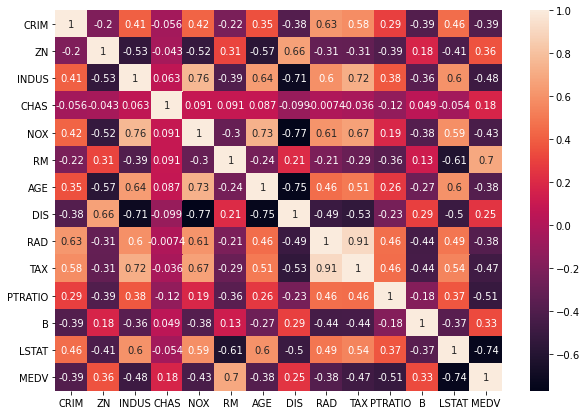

In [110]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

In [111]:
## Dropping Multicollinear Features

drop_multicollinear_feature = ['AGE', 'RAD', ]

In [112]:
df = df.drop(drop_multicollinear_feature, axis=1)

Text(0.5, 0, 'MEDV')

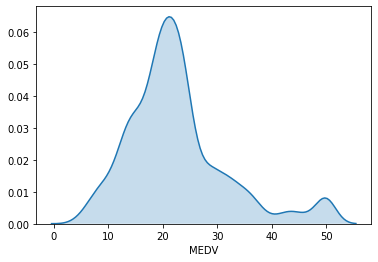

In [113]:
sns.kdeplot(dependent_variables, shade=True)
plt.xlabel("MEDV")

In [ ]:
# MEDV is little right skewed

In [114]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,222.0,18.7,396.90,5.33,36.2


In [115]:
X = df.drop(['MEDV'], axis=1)
y = dependent_variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [116]:
stn_scaler = StandardScaler()
X_train_scaled = stn_scaler.fit_transform(X_train)
X_test_scaled = stn_scaler.transform(X_test)

In [119]:
## Without setting hyperparameters

In [120]:
rrf = RandomForestRegressor()
rrf.fit(X_train_scaled, y_train)
y_pred_rrf = rrf.predict(X_test_scaled)

In [121]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rrf)))

RMSE: 3.671478326554878


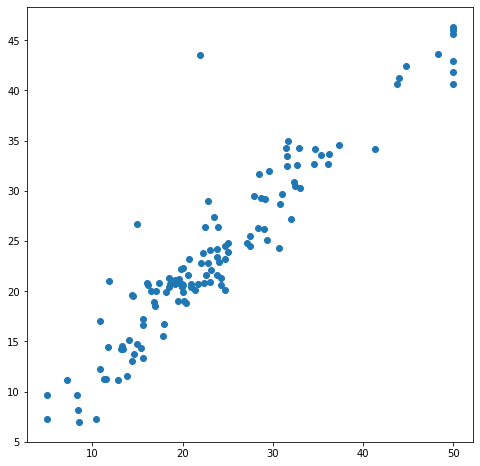

In [131]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rrf)

In [122]:
## With Hyperparameters
params = {'criterion':['mse','mae'],
          'max_depth':range(1,10),
          'min_samples_split':range(1,10),
          'min_samples_leaf':range(1,5)
}

In [123]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(RandomForestRegressor(), 
                  param_grid=params,
                  cv=5,
                  verbose=1,
                    n_jobs=50)

In [124]:
gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   17.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:   30.3s
[Parallel(n_jobs=50)]: Done 700 tasks      | elapsed:   52.3s
[Parallel(n_jobs=50)]: Done 1150 tasks      | elapsed:  1.4min
[Parallel(n_jobs=50)]: Done 1700 tasks      | elapsed:  2.1min
[Parallel(n_jobs=50)]: Done 2350 tasks      | elapsed:  3.7min
[Parallel(n_jobs=50)]: Done 3100 tasks      | elapsed:  6.5min
[Parallel(n_jobs=50)]: Done 3240 out of 3240 | elapsed:  6.9min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=50,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [125]:
gs.best_params_

{'criterion': 'mse',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [126]:
gs.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_split=4)

In [127]:
rrf2 = RandomForestRegressor(criterion='mse' , max_depth=7, min_samples_split=4)
rrf2.fit(X_train_scaled, y_train)
y_pred_rrf2 = rrf2.predict(X_test_scaled)

In [128]:
print(np.sqrt(mean_squared_error(y_test, y_pred_rrf2)))

3.7450178748933522


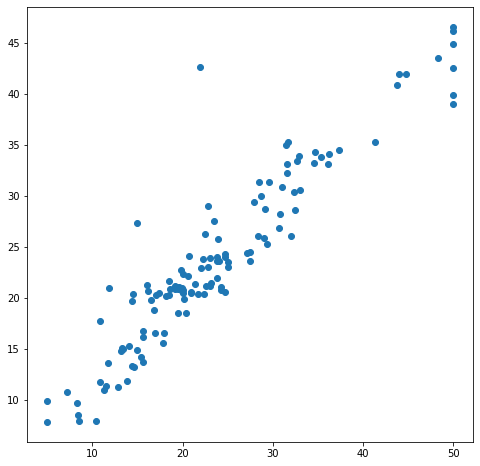

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_rrf2)

In [ ]:
# some points are incorrectly identified by the model